In [2]:
''' this notebook plots the boostrapping results from Stasinski et al. 2024
by Jan Stasinski '''

' this notebook plots the boostrapping results from Stasinski et al. 2024\nby Jan Stasinski '

In [48]:

import numpy as np
import scipy.io as sio
import scipy.signal as sig
from tvb.simulator.lab import *
import matplotlib.pyplot as plt


from tvb.basic.neotraits.api import NArray, List, Range, Final
from scipy.stats import zscore
from scipy import signal
import string
import matplotlib.patches as patches

sys.path.append('/Users/jansta/fic_jansen/stability_analysis')
from supplementary_functions import *
Mdef = 1000

DATA_LOC2 = '/Users/jansta/fic_jansen/stability_analysis/paper_sims/paper_hcp_sims/y0_072/'
PLOT_LOC = '/Users/jansta/fic_jansen/stability_analysis/paper_plots/II_plots/'

DATA_BS = '/Users/jansta/fic_jansen/stability_analysis/paper_sims/paper_hcp_sims/y0_072/bootstrap/'

In [2]:
plt.rcParams["text.usetex"] = True
lat_y0t = '$y_{{0}}^{{\\mathrm{{target}}}}$'

In [3]:

gcs = [str(g) for g in range(30)]
y0s = [str(i) for i in [0.001, 0.004, 0.007, 0.01, 0.013, 0.016, 0.0189, 0.1, 0.11, 0.12, 0.13, 0.14]]

## loading mmf values per y0t, per gc, per window
mmf_comb_dict,  mmf_comb_dict_nf = np.load(DATA_BS + 'both_mmf_boots_dicts.npy', allow_pickle=True)

#loading the full length mmf values:
full_mmf_mat = np.load('/Users/jansta/fic_jansen/stability_analysis/paper_sims/paper_hcp_sims/y0_072/mmf_thresh_fit_map.npy', allow_pickle=True)

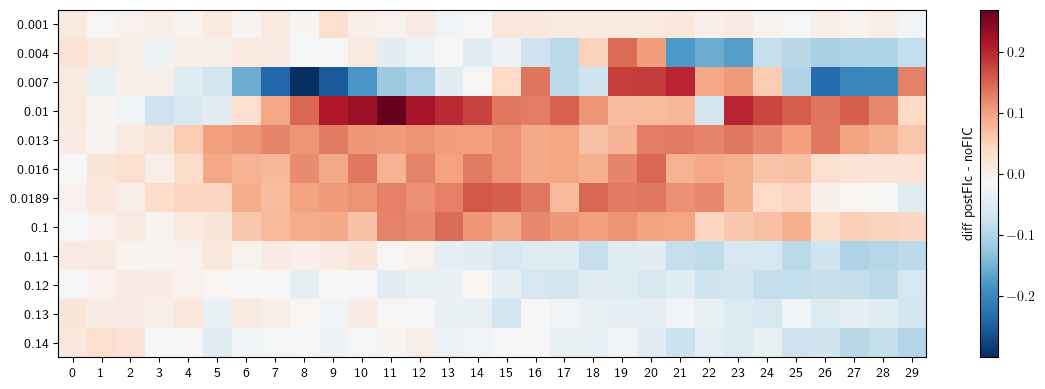

In [4]:
full_mmf_dif = full_mmf_mat[:12,:]- full_mmf_mat[12:,:]
fig, ax = plt.subplots(1, figsize=(14,5));
i = ax.imshow(full_mmf_dif, cmap='RdBu_r');
cb = fig.colorbar(i,shrink =0.9);
ax.set_yticks(range(12));
ax.set_yticklabels(y0s);
ax.set_xticks(range(30));
ax.set_xticklabels(gcs);
cb.set_label('diff postFIc - noFIC')
cb.ax.yaxis.set_label_position('left')
fig.savefig(DATA_BS + 'MMF_differences_post-no.png')

In [28]:
pvalues_bs = np.load(DATA_BS + 'boots_pvals_1k_1600TR_mat.npy', allow_pickle=True).item()
pvalues_bs.keys()


dict_keys(['p30mins_postFIC', 'pwins_postFIC', 'p30mins_noFIC', 'pwins_noFIC'])

In [35]:

pvalues_bs['pwins_postFIC'][2,17:19] = np.nan
pvalues_bs['pwins_noFIC'][2,17:19] = np.nan
pvalues_bs['pwins_postFIC'][1,18:21] = np.nan
pvalues_bs['pwins_noFIC'][1,18:21] = np.nan
# dif_mmf_mat2max[:,:,2,17:19] = np.nan
# dif_mmf_mat2max[:,:,1,18:21] = np.nan
# #pvalues_bs['p30mins_postFIC'].shape

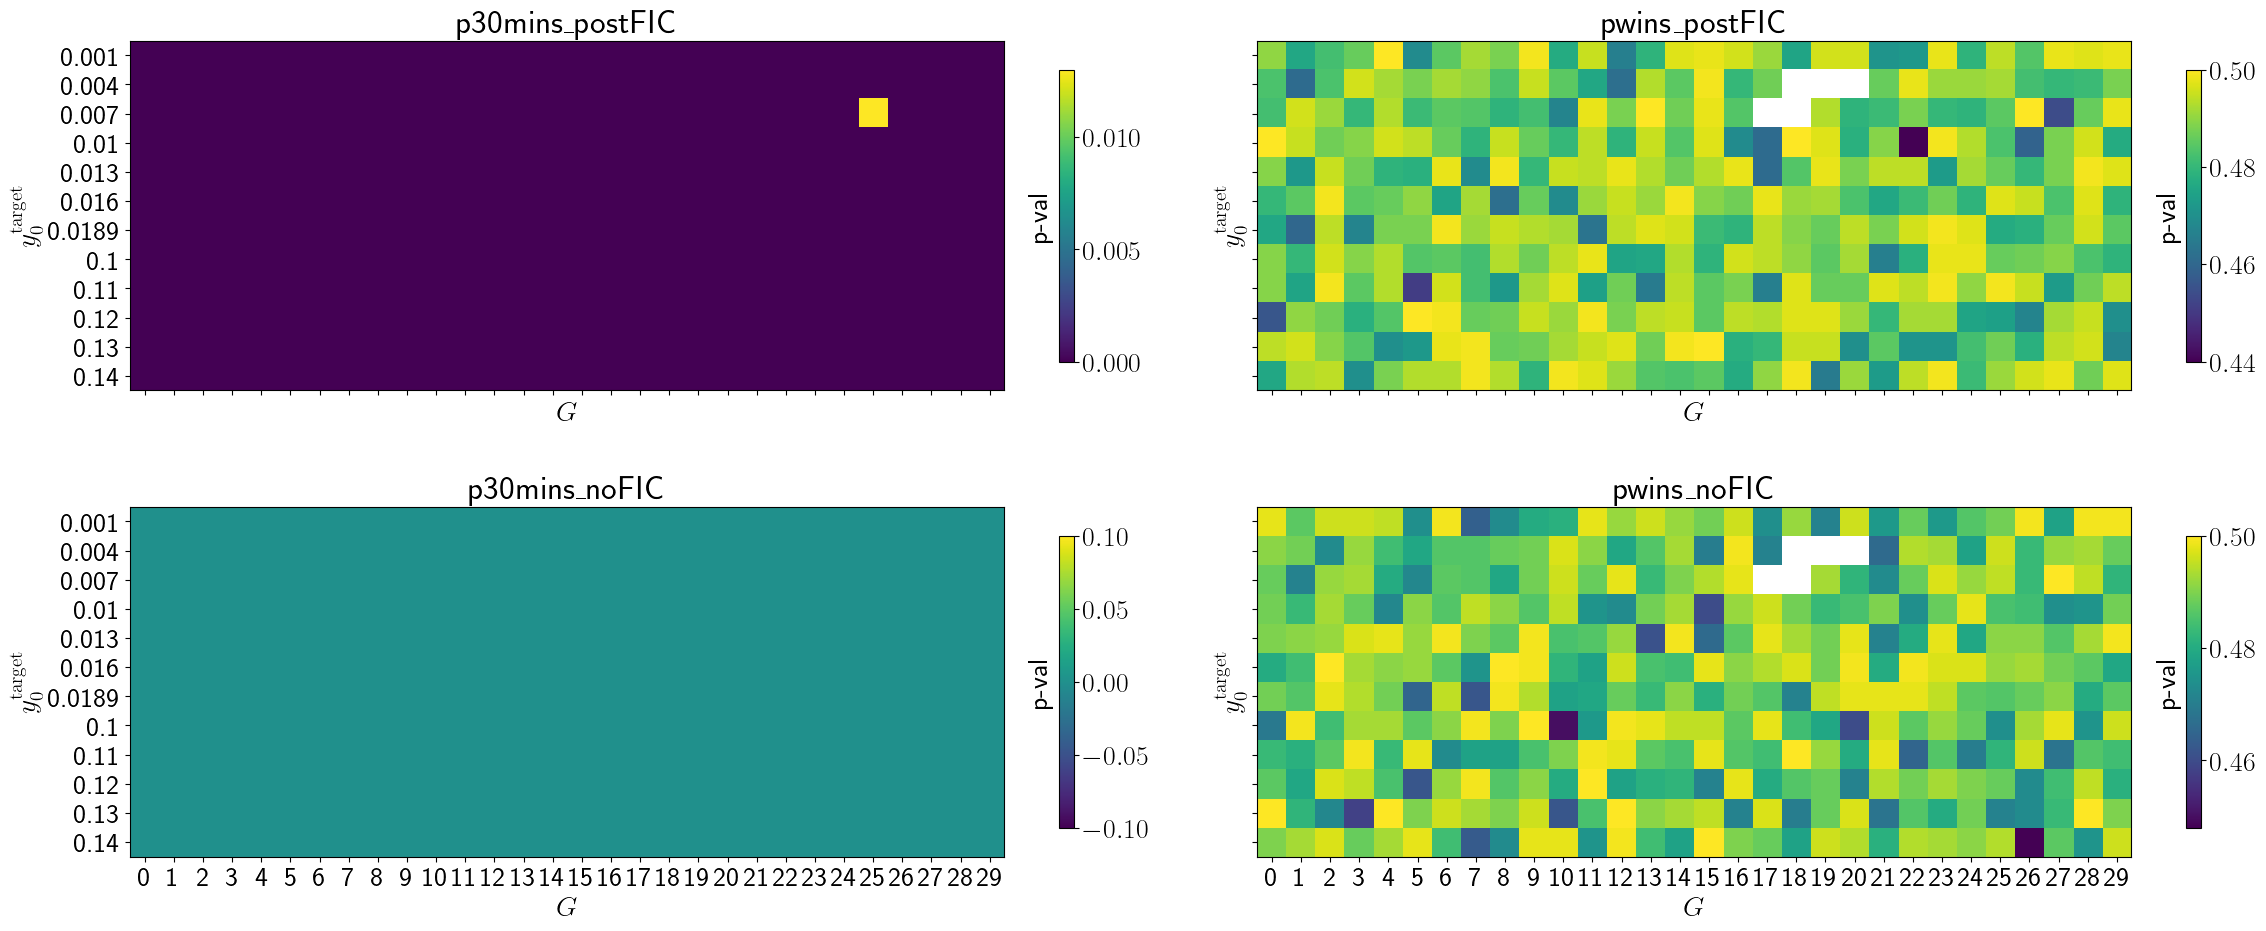

In [36]:
# Set global font size
plt.rcParams.update({'font.size': 20})

# Define figure size and shrink factor
FIGSIZE = (24, 10)
SHRINK_FACTOR = 0.65 # Adjust as needed

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=FIGSIZE, sharex=True, sharey=True)

# Define titles and data for each subplot
titles_and_data = pvalues_bs.items()

# Loop through subplots and set titles, data, and colorbars
for ax, (title, data) in zip(axs.flatten(), titles_and_data):
    im = ax.imshow(data)
    cbar = fig.colorbar(im, shrink=SHRINK_FACTOR)
    cbar.set_label('p-val')
    cbar.ax.yaxis.set_label_position('left')
    ax.set_title(title)

# Set y-ticks and labels for all subplots
for ax in axs.flatten():
    ax.set_yticks(range(12))
    ax.set_yticklabels(y0s)

# Set x-ticks and labels for all subplots
for ax in axs.flatten():
    ax.set_xticks(range(30))
    ax.set_xticklabels(gcs)

# Set y-label for all subplots
for ax in axs.flatten():
    ax.set_ylabel(lat_y0t)

# Set x-label for all subplots
for ax in axs.flatten():
    ax.set_xlabel('$G$')

# Adjust layout and save figure
fig.tight_layout()
fig.savefig(DATA_BS + 'bootstrapping_mmf_1600_but_correct.png')

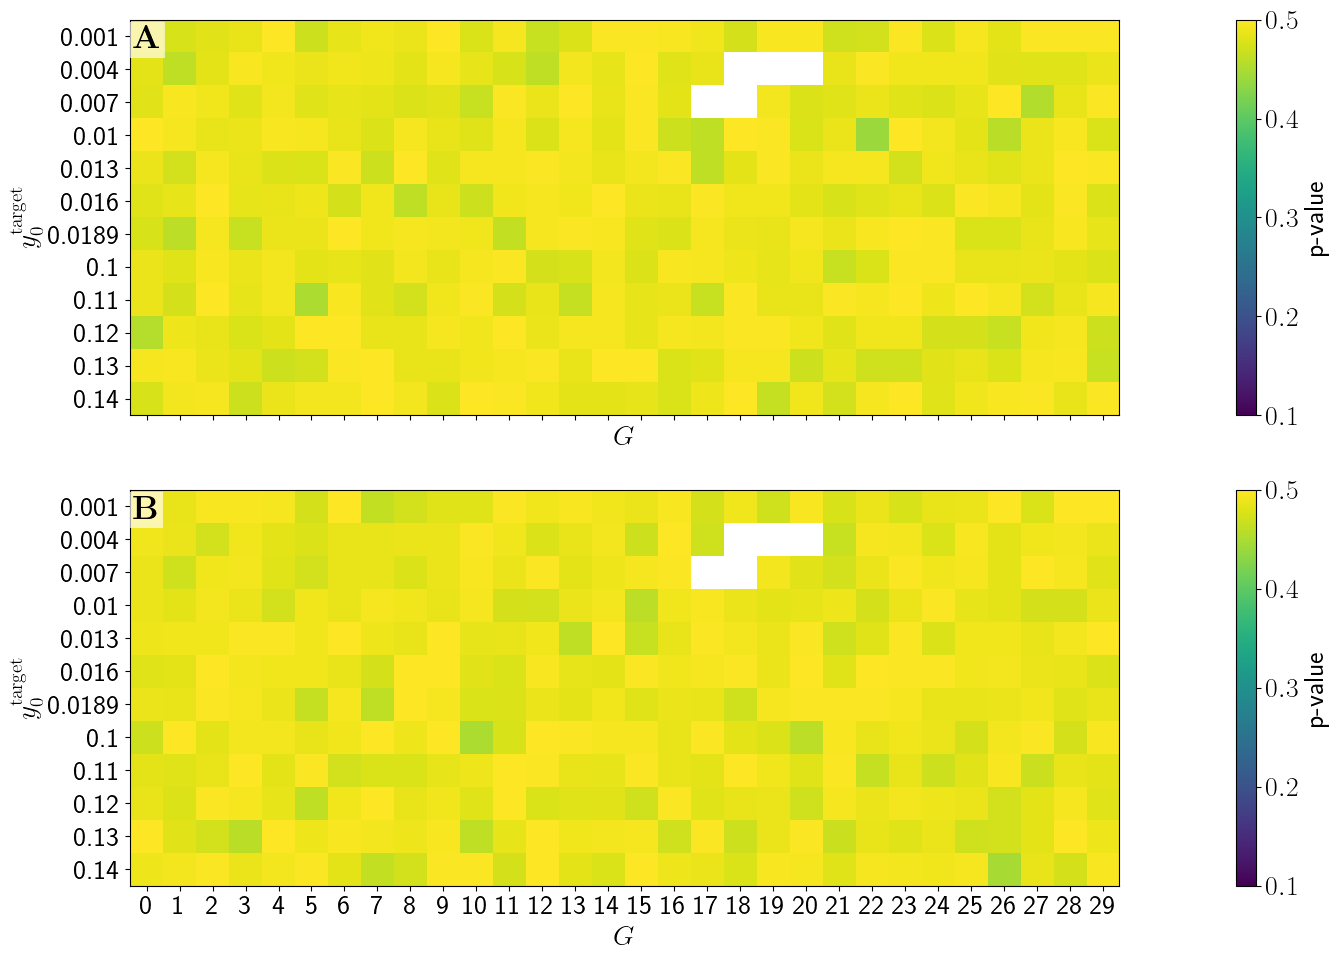

In [50]:
# Set global font size
plt.rcParams.update({'font.size': 20})

# Define figure size and shrink factor
FIGSIZE = (24, 10)
SHRINK_FACTOR = 1 # Adjust as needed

# Create figure and subplots
fig, axs = plt.subplots(2, 1, figsize=FIGSIZE, sharex=True, sharey=True)

# Define titles and data for each subplot
titles_and_data = [list(pvalues_bs.items())[1], list(pvalues_bs.items())[3]]

# Loop through subplots and set titles, data, and colorbars
for ax, (title, data) in zip(axs.flatten(), titles_and_data):
    im = ax.imshow(data)
    cbar = fig.colorbar(im, shrink=SHRINK_FACTOR)
    cbar.set_label('p-value')
    cbar.ax.yaxis.set_label_position('left')
    im.set_clim(0.1,0.5)
    #ax.set_title(title)

# Set y-ticks and labels for all subplots
for ax in axs.flatten():
    ax.set_yticks(range(12))
    ax.set_yticklabels(y0s)

# Set x-ticks and labels for all subplots
for ax in axs.flatten():
    ax.set_xticks(range(30))
    ax.set_xticklabels(gcs)

# Set y-label for all subplots
for ax in axs.flatten():
    ax.set_ylabel(lat_y0t)

# Set x-label for all subplots
for ax in axs.flatten():
    ax.set_xlabel('$G$')
AddPanelLabels(axs, label=PanelsLettersUpper.T, fontsize=24)
# Adjust layout and save figure
fig.tight_layout()
fig.savefig(DATA_BS + 'bootstrapping_mmf_1600_but_correct_two.png')